In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.mode.chained_assignment = None

In [2]:
from Code import plot_behavior, plot_gaze

## Set Paths and Parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 1
if wave == 1:
    problematic_subjects = [1, 3, 12, 19, 33, 45, 46]
elif wave == 2:
    problematic_subjects = [1, 2, 3, 4, 20, 29, 64]

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [5]:
SA_score="SPAI"

In [6]:
df_scores = pd.read_csv(os.path.join(file_path, 'scores_summary.csv'), decimal='.', sep=';')
df_ratings = pd.read_csv(os.path.join(file_path, 'ratings.csv'), decimal='.', sep=';')
df_scores = df_scores.loc[~df_scores['exclude']]
median = df_scores[SA_score].median()

## Behavior

In [7]:
df_events = pd.read_csv(os.path.join(file_path, 'events.csv'), decimal='.', sep=';')
df_distance = pd.read_csv(os.path.join(file_path, 'distance_vh.csv'), decimal='.', sep=';')
df_movement = pd.read_csv(os.path.join(file_path, 'movement.csv'), decimal='.', sep=';')
df_walk_dist = pd.read_csv(os.path.join(file_path, 'walking_distance.csv'), decimal='.', sep=';')

In [8]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Behavior')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [9]:
# if wave == 1:
#     plot_ratings.plot_rating_agents_sad_clicks(df_ratings, df_events, SA_score=SA_score)
#     plt.savefig(os.path.join(save_path, f"ratings_humans_clicks_{SA_score}.png"), dpi=300, bbox_inches="tight")

### Movement

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Walking Distance (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=2.31, p=0.136, p_eta_2=0.04
Phase Main Effect, F(1, 46.0)=0.01, p=0.909, p_eta_2=0.0
Interaction Phase x SPAI, F(1, 46.0)=0.15, p=0.698, p_eta_2=0.0
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Average Distance To Start (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=1.83, p=0.183, p_eta_2=0.02
Phase Main Effect, F(1, 46.0)=0.07, p=0.792, p_eta_2=0.0
Interaction Phase x SPAI, F(1, 46.0)=0.72, p=0.402, p_eta_2=0.01
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Maximum Distance To Start (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=0.88, p=0.353, p_eta_2=0.01
P

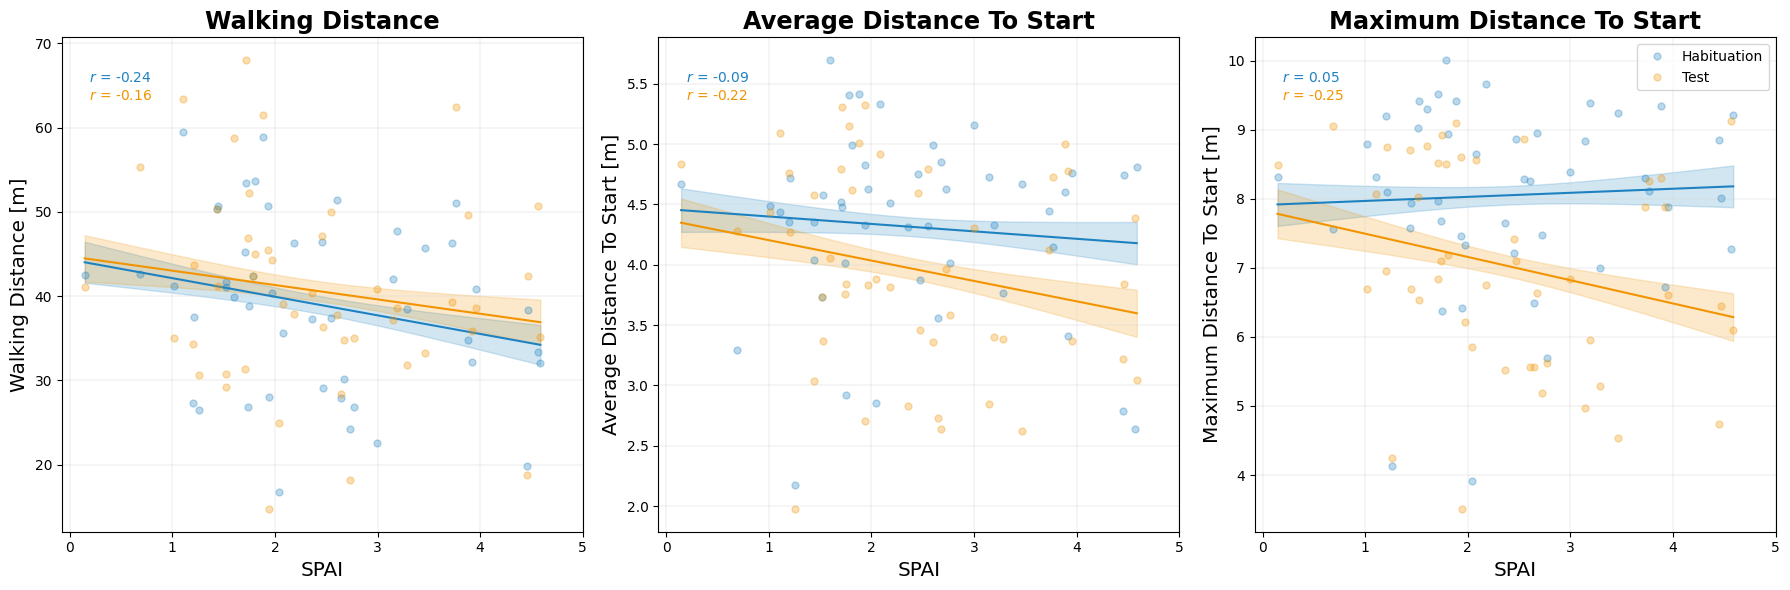

In [10]:
plot_behavior.plot_walking_distance(df_walk_dist, SA_score)
plt.savefig(os.path.join(save_path, f"walking_distance_grouped_{SA_score}.png"), dpi=300)

N HSA: 24
N LSA: 24


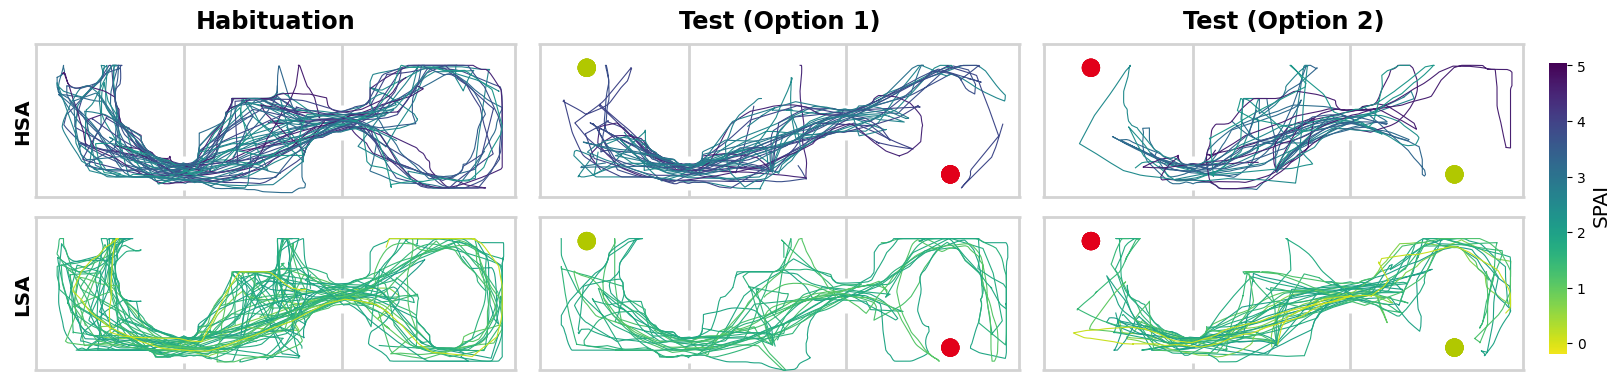

In [11]:
if wave == 1:
    # plot_behavior.plot_movement_single_plots(df_movement, wave, SA_score)
    plot_behavior.plot_movement_sad(df_movement, file_path, SA_score, median)
    plt.savefig(os.path.join(save_path, f"movement_median_{SA_score}.png"), dpi=300, bbox_inches='tight')
        
# if wave == 2:
#     plot_behavior.animate_movement(df_movement, 56, SA_score, save_path)

### Interpersonal Distance

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Minimum Interpersonal Distance (Phase, Condition and SPAI)
SPAI Main Effect, F(1, 46.0)=1.61, p=0.211, p_eta_2=0.01
Condition Main Effect, F(1, 138.0)=2.79, p=0.097, p_eta_2=0.02
Phase Main Effect, F(1, 138.0)=30.75, p=0.0, p_eta_2=0.16
Interaction Phase x Condition, F(1, 138.0)=2.58, p=0.111, p_eta_2=0.02
Interaction Phase x SPAI, F(1, 138.0)=0.07, p=0.787, p_eta_2=0.0
Interaction Condition x SPAI, F(1, 138.0)=0.91, p=0.343, p_eta_2=0.01
Inte

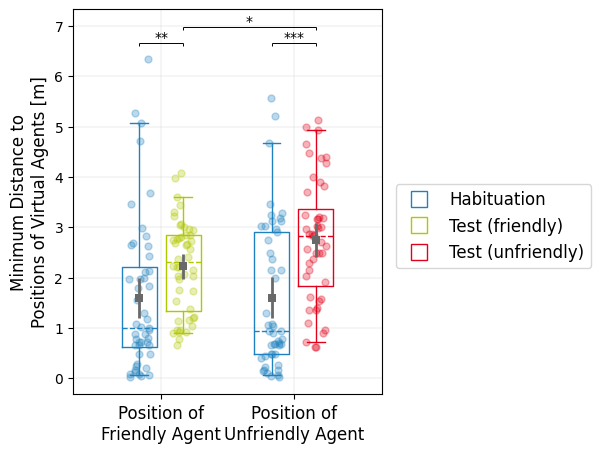

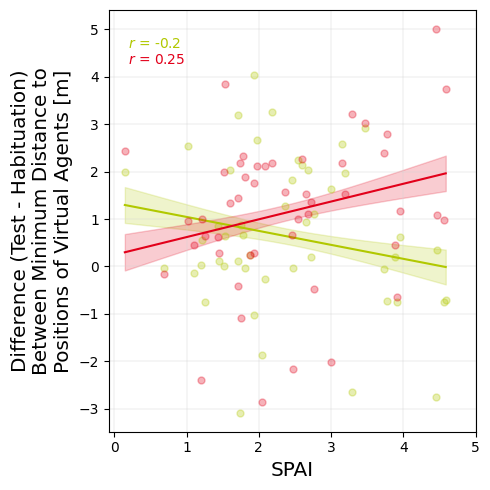

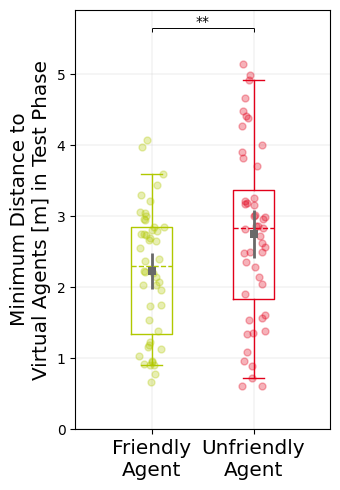

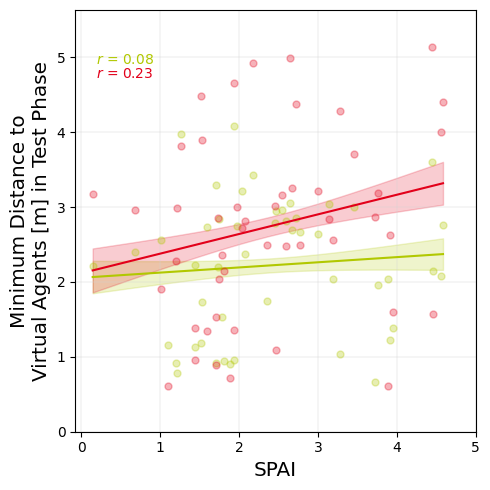

In [12]:
dist = "min"
if wave == 1:
    plot_behavior.plot_interpersonal_distance_diff(df_distance, save_path, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_hab-test.png"), dpi=300, bbox_inches="tight")

    plot_behavior.plot_interpersonal_distance_diff_sad(df_distance, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_diff_{SA_score}.png"), dpi=300)
    
    plot_behavior.plot_interpersonal_distance(df_distance, save_path, wave, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test.png"), dpi=300)

    plot_behavior.plot_interpersonal_distance_sad(df_distance, wave, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test_{SA_score}.png"), dpi=300)
    
if wave == 2:
    plot_behavior.plot_interpersonal_distance(df_distance, save_path, wave, dist, SA_score, only_visible=False)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test.png"), dpi=300)
    
    plot_behavior.plot_interpersonal_distance_sad(df_distance, wave, dist, SA_score, only_visible=False)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test_{SA_score}.png"), dpi=300)
    
    plot_behavior.plot_interpersonal_distance(df_distance, save_path, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_vis_test.png"), dpi=300)

    plot_behavior.plot_interpersonal_distance_sad(df_distance, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_vis_test_{SA_score}.png"), dpi=300)

### Duration

boundary (singular) fit: see help('isSingular') 
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Duration in Rooms (Condition and SPAI)
Condition Main Effect, F(1, 83.0)=1.67, p=0.199, p_eta_2=0.02
SPAI Main Effect, F(1, 83.0)=0.43, p=0.512, p_eta_2=0.01
Interaction Condition x SPAI, F(1, 83.0)=0.56, p=0.456, p_eta_2=0.01
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
boundary (singular) fit: see help('isSingular') 
boundary (singular) fi

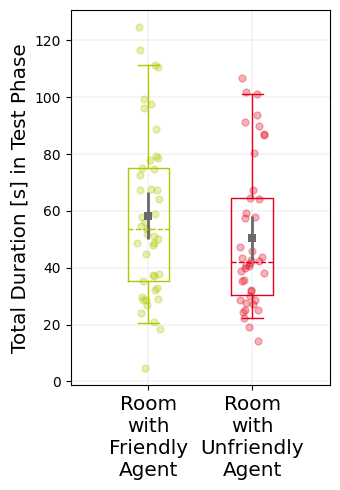

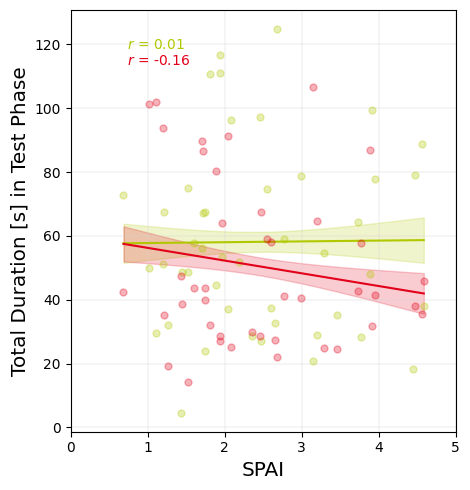

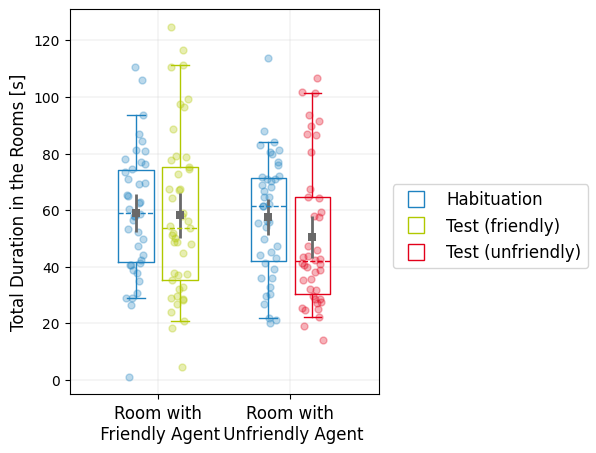

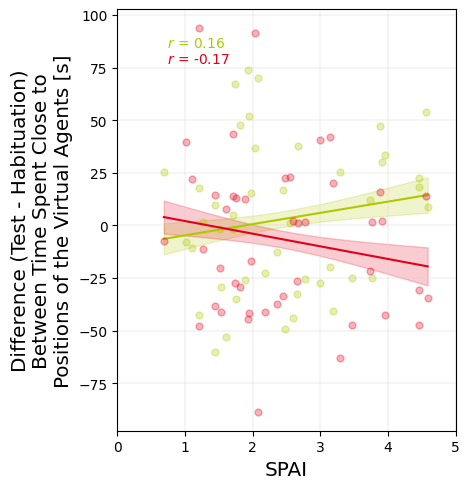

In [13]:
if wave == 1:
    # plot_behavior.plot_time_rooms(df_events, SA_score)
    # plt.savefig(os.path.join(save_path, f"duration_rooms.png"), dpi=300, bbox_inches="tight")
    bad_vps = [11, 55, 63]
    plot_behavior.plot_time_rooms_agents_static(df_events.loc[~df_events["VP"].isin(bad_vps)], save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_test.png"), dpi=300)
    
    plot_behavior.plot_time_test_rooms_agents_static_sad(df_events.loc[~df_events["VP"].isin(bad_vps)], SA_score)
    plt.savefig(os.path.join(save_path, f"duration_test_{SA_score}.png"), dpi=300)
    
    plot_behavior.plot_time_rooms_agents_static_diff(df_events.loc[~df_events["VP"].isin(bad_vps)], save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_hab-test.png"), dpi=300, bbox_inches="tight")

    plot_behavior.plot_time_rooms_agents_static_diff_sad(df_events.loc[~df_events["VP"].isin(bad_vps)], SA_score)
    plt.savefig(os.path.join(save_path, f"duration_diff_{SA_score}.png"), dpi=300)

if wave == 2:
    plot_behavior.plot_time_rooms_agents_dynamic(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_room_test.png"), dpi=300)

    plot_behavior.plot_time_test_rooms_agents_dynamic_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_room_test_{SA_score}.png"), dpi=300)
    
    plot_behavior.plot_time_test_look_agents_dynamic(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_look_test.png"), dpi=300)
    
    plot_behavior.plot_time_test_look_agents_dynamic_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_look_test_{SA_score}.png"), dpi=300)

### Clicks

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Clicks (Condition and SPAI)
SPAI Main Effect, F(1, 46.0)=0.17, p=0.679, p_eta_2=0.0
Condition Main Effect, F(1, 46.0)=11.7, p=0.001, p_eta_2=0.18
Interaction Condition x SPAI, F(1, 46.0)=0.33, p=0.568, p_eta_2=0.01
P-values adjusted by holm method for 1 comparisons


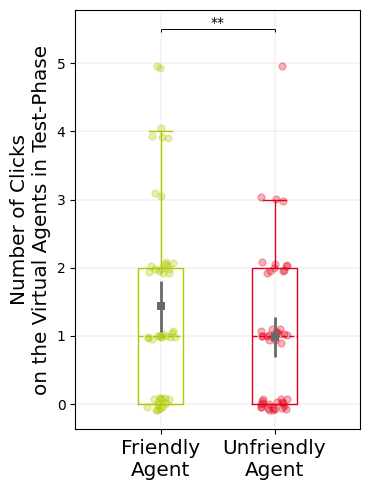

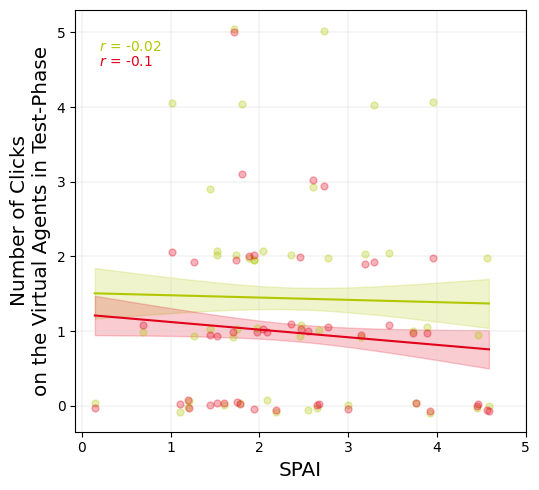

In [14]:
if wave == 1:
    plot_behavior.plot_clicks(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"clicks_test.png"), dpi=300)

    plot_behavior.plot_clicks_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"clicks_test_{SA_score}.png"), dpi=300)

### Relationship between different approach-avoidance domains

In [15]:
# df_diff_dis = plot_behavior.plot_diff_distance(df_distance, wave, SA_score)
# plt.savefig(os.path.join(save_path, f"distance_test-diff_{SA_score}.png"), dpi=300)
# 
# df_diff_dur = plot_behavior.plot_diff_duration(df_events, wave, SA_score)
# plt.savefig(os.path.join(save_path, f"duration_test-diff_{SA_score}.png"), dpi=300)
# 
# df_gaze = pd.read_csv(os.path.join(file_path, 'gaze.csv'), decimal='.', sep=';')
# df_diff_gaze = plot_gaze.plot_diff_gaze(df_gaze, SA_score=SA_score)
# plt.savefig(os.path.join(save_path, f"gaze_test_gaze_proportion_diff_{SA_score}.png"), dpi=300)

In [16]:
# df_diff = df_diff_gaze.merge(df_diff_dur, on="VP")
# df_diff = df_diff.merge(df_diff_dis, on="VP")
# 
# x = df_diff["dis_diff"].to_numpy()
# y = df_diff["dur_diff"].to_numpy()
# linreg = linregress(x, y)
# print(f"Interpersonal Distance x Duration: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")
# 
# x = df_diff["dis_diff"].to_numpy()
# y = df_diff["gaze_diff"].to_numpy()
# linreg = linregress(x, y)
# print(f"Interpersonal Distance x Gaze: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")
# 
# x = df_diff["dur_diff"].to_numpy()
# y = df_diff["gaze_diff"].to_numpy()
# linreg = linregress(x, y)
# print(f"Gaze x Duration: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")
# 
# df_diff.head()